15-2. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Visualization
ÏùòÎ£åÏòÅÏÉÅÏùò ÌäπÏßïÏùÑ ÏÇ¥Ìé¥Î≥¥Í∏∞ ÏúÑÌï¥ Ïò§Îäò Ïö∞Î¶¨Í∞Ä Îã§Î£∞ ÏúÑÎÇ¥ÏãúÍ≤Ω Ïö©Ï¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ÑÏ≤òÎ¶¨ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÎäî Í≥ºÏ†ïÏùÑ Î®ºÏ†Ä ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î°úÎî©Ìï¥ Ï§çÎãàÎã§.

In [49]:
# ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
from __future__ import absolute_import, division
from __future__ import print_function, unicode_literals

import os
import time
import shutil
import functools

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
from IPython.display import clear_output

import tensorflow as tf
import tensorflow_addons as tfa
print(tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import models

2.6.0


Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
Ïò§ÎäòÏùò ÌîÑÎ°úÏ†ùÌä∏Îäî Giana DatasetÏóêÏÑú Ï†úÍ≥µÌïòÎäî Ïö©Ï¢Ö ÎÇ¥ÏãúÍ≤Ω Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏßÑÌñâÌï† Í≤ÉÏûÖÎãàÎã§.

Ïò§Îäò Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† ÏòÅÏÉÅÏùò Í∑∏ÎûúÎìúÏ±åÎ¶∞ÏßÄ Í∏∞Í∞ÑÏù¥ ÏßÄÎÇ¨Îã§Î©¥ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìúÍ∞Ä ÏõêÌôúÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÏïÑÎûò ÏΩîÎìúÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï¥ Ï§çÎãàÎã§.

In [51]:
!mkdir -p ~/aiffel/medical
!ln -s ~/data/* ~/aiffel/medical

ln: failed to create symbolic link '/aiffel/aiffel/medical/ed_ckpt': File exists
ln: failed to create symbolic link '/aiffel/aiffel/medical/train': File exists
ln: failed to create symbolic link '/aiffel/aiffel/medical/train_labels': File exists
ln: failed to create symbolic link '/aiffel/aiffel/medical/unet_ckpt': File exists


Split dataset into train data and test data
ÏúÑÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÏö©Í≥º ÌÖåÏä§Ìä∏Ïö©ÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÄ Í∞ÅÍ∞Å train, train_labels ÎîîÎ†âÌÜ†Î¶¨Ïóê Î∂ÑÎ¶¨ÎêòÏñ¥ ÏûàÍ≥†, ÏåçÏùÑ Ïù¥Î£®Îäî Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®Ïùò ÌååÏùºÎ™ÖÏùÄ ÎèôÏùºÌï©ÎãàÎã§. Í∑∏Î¶¨Í≥† ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò train_test_splitÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÌïôÏäµ(train) Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏(test) Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï† Í≤ÉÏûÖÎãàÎã§.

In [52]:
DATASET_PATH = os.path.join(os.getenv('HOME'), 'aiffel', 'medical')

img_dir = os.path.join(DATASET_PATH, "train")
label_dir = os.path.join(DATASET_PATH, "train_labels")

In [53]:
x_train_filenames = [os.path.join(img_dir, filename) for filename in os.listdir(img_dir)]
x_train_filenames.sort()
y_train_filenames = [os.path.join(label_dir, filename) for filename in os.listdir(label_dir)]
y_train_filenames.sort()

In [54]:
x_train_filenames, x_test_filenames, y_train_filenames, y_test_filenames = \
                    train_test_split(x_train_filenames, y_train_filenames, test_size=0.2)

In [55]:
num_train_examples = len(x_train_filenames)
num_test_examples = len(x_test_filenames)

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 240
Number of test examples: 60


Ïûò Î°úÎî©ÎêòÏóàÎÇòÏöî? ÏÉùÍ∞ÅÎ≥¥Îã§ Ïù¥ÎØ∏ÏßÄ Í∞ØÏàòÍ∞Ä ÎßéÏßÄ ÏïäÏäµÎãàÎã§. Ïö∞Î†§Í∞Ä ÎêòÏßÄ ÏïäÏúºÏãúÎÇòÏöî? Í≥ºÏó∞ Ïù¥ Ï†ïÎèÑ Í∞ØÏàòÏùò Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÌõàÎ†®Îê† Ïàò ÏûàÏùÑÍπåÏöî? Í∑∏Îü¨ÎÇò ÏùòÎ£åÏòÅÏÉÅ Ï≤òÎ¶¨ Î∂ÑÏïºÎäî Ïñ∏Ï†úÎì† Ïù¥Î†áÍ≤å Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò Î∂ÄÏ°± Î¨∏Ï†úÏóê ÏãúÎã¨Î†§Ïïº Ìï† ÎïåÍ∞Ä ÎßéÏùÑ Í≤ÉÏûÖÎãàÎã§.

Visualization
Îç∞Ïù¥ÌÑ∞ ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÏÉòÌîåÏùÑ 5Í∞ú Ï†ïÎèÑ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

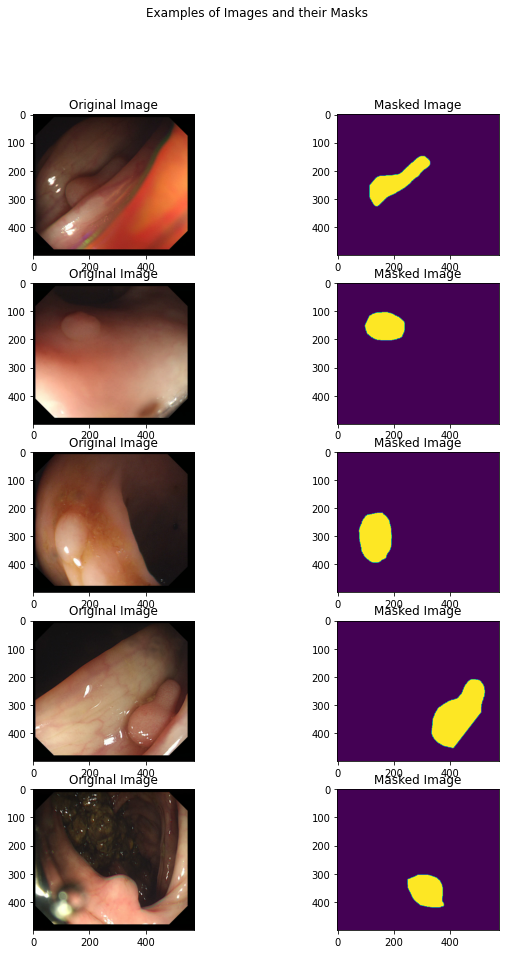

In [56]:
display_num = 5

r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(10, 15))
for i in range(0, display_num * 2, 2):
    img_num = r_choices[i // 2]
    x_pathname = x_train_filenames[img_num]
    y_pathname = y_train_filenames[img_num]

    plt.subplot(display_num, 2, i + 1)
    plt.imshow(Image.open(x_pathname))
    plt.title("Original Image")

    example_labels = Image.open(y_pathname)
    label_vals = np.unique(example_labels)

    plt.subplot(display_num, 2, i + 2)
    plt.imshow(example_labels)
    plt.title("Masked Image")
    
plt.suptitle("Examples of Images and their Masks")
plt.show()

Î≥¥ÏãúÎäî Í≤ÉÏ≤òÎüº ÎùºÎ≤®ÏùÄ ÌÅ¥ÎûòÏä§ Í∞íÏù¥ ÏïÑÎãàÎùº, ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄÏôÄ ÎèôÏùºÌïú X-Y ÏÇ¨Ïù¥Ï¶àÎ•º Í∞ÄÏßÄÍ≥† Ïö©Ï¢Ö Î∂ÄÏúÑÎßå ÌëúÏãúÎêú 1Ï±ÑÎÑêÏßúÎ¶¨ Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§. Ï¶â, Ïö∞Î¶¨Í∞Ä Ïò§Îäò ÎèÑÏ†ÑÌï† ÌÉúÏä§ÌÅ¨Îäî Image classificationÏù¥ ÏïÑÎãàÎùº Semantic SegmentationÏù¥ Îê©ÎãàÎã§.

15-3. Data pipeline and Preprocessing
Set up hyper-parameters
Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï†ÅÏö©Îê† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÎØ∏Î¶¨ ÏÖãÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§.

In [57]:
# Set hyperparameters

image_size = 256
img_shape = (image_size, image_size, 3)
batch_size = 8
max_epochs = 10

tf.dataÎ•º ÌôúÏö©Ìïú ÏûÖÎ†• ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Í≥Ñ
Ïò§Îäò Ïö∞Î¶¨Îäî tf.data.DatasetÏùÑ Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Ï∂ï, Î∞∞ÏπòÏ≤òÎ¶¨ Îì±ÏùÑ ÏßÑÌñâÌï† Í≤ÉÏûÖÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú Îã§ÏñëÌïú Ìï®ÏàòÎ•º mapÏóê Ï†ÅÏö©ÌïòÏó¨ Data AugmentationÏùÑ Ìï®Íªò Íµ¨ÌòÑÌï† Í≤ÉÏûÖÎãàÎã§.

Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏúºÎ°ú ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÄ tf.dataÏóê ÎåÄÌïú ÌÖêÏÑúÌîåÎ°úÏö∞ ÌäúÌÜ†Î¶¨ÏñºÏóê ÏÜåÍ∞úÎêú ÎÇ¥Ïö©ÏùÑ Ï†ïÎ¶¨Ìïú Í≤ÉÏûÖÎãàÎã§.

Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏î Î™®Îëê ÌååÏùº Ïù¥Î¶ÑÏóêÏÑú ÌååÏùºÏùò Î∞îÏù¥Ìä∏(Ïª¥Ìì®ÌÑ∞Îäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥ÏßÑ ÎπÑÌä∏(bit)Ïùò Ï°∞Ìï©ÏúºÎ°ú ÌëúÌòÑÌï©ÎãàÎã§. 8Í∞úÏùò ÎπÑÌä∏Í∞Ä Î™®Ïó¨ 1Î∞îÏù¥Ìä∏(byte)Î•º Íµ¨ÏÑ±ÌïòÎ©∞, Î∞îÏù¥Ìä∏Îäî Ïª¥Ìì®ÌÑ∞Í∞Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÍ≥† Ï≤òÎ¶¨ÌïòÎäî Í∏∞Î≥∏Ï†ÅÏù∏ Îã®ÏúÑ)Î•º ÏùΩÏäµÎãàÎã§. ÎùºÎ≤®ÏùÄ Ïã§Ï†úÎ°ú Í∞Å ÌîΩÏÖÄÏù¥ Ïö©Ï¢ÖÎç∞Ïù¥ÌÑ∞Î°ú (1, 0)ÏúºÎ°ú Ï£ºÏÑùÏù¥ Îã¨Î¶∞ Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.
Î∞îÏù¥Ìä∏Î•º Ïù¥ÎØ∏ÏßÄ ÌòïÏãùÏúºÎ°ú ÎîîÏΩîÎî©(Î∞îÏù¥Ìä∏Îì§ÏùÑ Ïù¥ÎØ∏ÏßÄ ÌòïÏãùÏóê ÎßûÍ≤å Ìï¥ÏÑùÌïòÏó¨ ÌîΩÏÖÄ Í∞í, ÏÉâÏÉÅ Ï†ïÎ≥¥ Îì±ÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§.)Ìï©ÎãàÎã§.
_augment Ìï®ÏàòÎ•º ÌÜµÌïú Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Ï†ÅÏö© : (optional, input parametersÏóê Îî∞ÎùºÏÑú)
resize-Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏ§Ä ÌÅ¨Í∏∞Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§ (eda ÎòêÎäî Í≥ÑÏÇ∞ / Î©îÎ™®Î¶¨ Ï†úÌïúÏóê ÏùòÌï¥ Í≤∞Ï†ïÎê®)
resizeÏùò Ïù¥Ïú†Îäî U-NetÏù¥ fully convolution networks Ïù¥ÎØÄÎ°ú ÏûÖÎ†• ÌÅ¨Í∏∞Ïóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Í∑∏Îü¨ÎÇò Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïòÏßÄ ÏïäÏúºÎ©¥ Í∞ÄÎ≥Ä Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ìï®Íªò Î∞∞Ïπò Ìï† Ïàò ÏóÜÏúºÎØÄÎ°ú Î∞∞Ïπò ÌÅ¨Í∏∞ 1ÏùÑ ÏÇ¨Ïö©Ìï¥ÏïºÌï©ÎãàÎã§.
ÏÑ±Îä•Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏúºÎØÄÎ°ú Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïòÏó¨ ÎØ∏Îãà Î∞∞ÏπòÎ≥ÑÎ°ú Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïòÏó¨ ÎØ∏Îãà Î∞∞ÏπòÎ≥ÑÎ°ú Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
*hue_delta-RGB Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏ°∞Î•º ÎûúÎç§ Ìå©ÌÑ∞Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§. Ïù¥Í≤ÉÏùÄ Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÏóêÎßå Ï†ÅÏö©Îê©ÎãàÎã§ (ÎùºÎ≤® Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎãò). hue_deltaÎäî[0, 0.5]Í∞ÑÍ≤©Ïóê ÏûàÏñ¥ÏïºÌï©ÎãàÎã§.
*horizontal_flip-0.5 ÌôïÎ•†Î°ú Ï§ëÏã¨ Ï∂ïÏùÑ Îî∞Îùº Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÌèâÏúºÎ°ú Îí§ÏßëÏäµÎãàÎã§. Ïù¥ Î≥ÄÌôòÏùÄ Î†àÏù¥Î∏îÍ≥º Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ Î™®ÎëêÏóê Ï†ÅÏö©Ìï¥ÏïºÌï©ÎãàÎã§.
*width_shift_range Î∞èheight_shift_rangeÎäî Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÎ°ú ÎòêÎäî ÏÑ∏Î°úÎ°ú ÏûÑÏùòÎ°ú Î≥ÄÌôòÌïòÎäî Î≤îÏúÑ (Ï†ÑÏ≤¥ ÎÑàÎπÑ ÎòêÎäî ÎÜíÏù¥Ïùò ÏùºÎ∂Ä)ÏûÖÎãàÎã§. Ïù¥ Î≥ÄÌôòÏùÄ Î†àÏù¥Î∏îÍ≥º Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ Î™®ÎëêÏóê Ï†ÅÏö©Ìï¥Ïïº Ìï©ÎãàÎã§.
*rescale-Ïù¥ÎØ∏ÏßÄÎ•º ÏùºÏ†ïÌïú ÎπÑÏú®Î°ú Îã§Ïãú Ï°∞Ï†ïÌï©ÎãàÎã§ (Ïòà : 1/255.)

Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÍ≥†, Îç∞Ïù¥ÌÑ∞Î•º Î∞òÎ≥µÌïòÏó¨ ÌïôÏäµÌï©ÎãàÎã§.
Data augmentationÏùò ÌïÑÏöîÏÑ±
Data augmentationÏùÄ Îî•Îü¨ÎãùÏùÑ Ïù¥Ïö©Ìïú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Î∂ÑÏïº (classification, detection, segmentation Îì±) ÏóêÏÑú ÎÑêÎ¶¨ Ïì∞Ïù¥Îäî ÌÖåÌÅ¨ÎãâÏûÖÎãàÎã§. ÏùòÎ£åÏòÅÏÉÅ Ï≤òÎ¶¨ÏôÄ Í∞ôÏù¥ Îç∞Ïù¥ÌÑ∞ Í∞ØÏàòÍ∞Ä Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ïù¥Îü∞ Í∏∞Î≤ïÏù¥ ÌÅ∞ ÌûòÏùÑ Î∞úÌúòÌïòÍ≤å Îê©ÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ÄÎäî Ïó¨Îü¨ Î¨¥ÏûëÏúÑ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ï¶ùÍ∞ÄÏãúÏºú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÑ "Ï¶ùÍ∞Ä"ÏãúÌÇµÎãàÎã§.
ÌõàÎ†® ÏãúÍ∞Ñ ÎèôÏïà Ïö∞Î¶¨ Î™®Îç∏ÏùÄ ÎòëÍ∞ôÏùÄ Í∑∏Î¶ºÏùÑ Îëê Î≤à Î≥º Ïàò ÏóÜÏäµÎãàÎã§. Îî∞ÎùºÏÑú OverfittingÏùÑ Î∞©ÏßÄÌïòÍ≥†, Î™®Îç∏Ïù¥ Ï≤òÏùåÎ≥¥Îäî Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Îçî Ïûò ÏùºÎ∞òÌôîÎêòÎèÑÎ°ù ÎèÑÏôÄÏ§çÎãàÎã§.

Processing each pathname
Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î¥ÖÏãúÎã§. Ïù¥ Ìï®Ïàò ÏïàÏóêÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

byte ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†, bmp(Î∞îÏù¥Ìä∏ ÌòïÌÉúÎ°ú Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º BMP (Bitmap) Ïù¥ÎØ∏ÏßÄ ÌòïÏãùÏóê ÎßûÍ≤å Ìï¥ÏÑùÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Î≥µÏõêÌïòÎäî Í≥ºÏ†ï)Î°ú ÎîîÏΩîÎî©Ìï©ÎãàÎã§.
ÎîîÏΩîÎî©Ïù¥ ÏôÑÎ£åÎêú imageÎ•º scaleÍ≥º sizeÎ•º Ï°∞Ï†àÌï©ÎãàÎã§.

In [58]:
def _process_pathnames(fname, label_path):
    # We map this function onto each pathname pair
    img_str = tf.io.read_file(fname)
    img = tf.image.decode_bmp(img_str, channels=3)

    label_img_str = tf.io.read_file(label_path)
    label_img = tf.image.decode_bmp(label_img_str, channels=3)
    label_img = tf.image.rgb_to_grayscale(label_img)

    resize = [image_size, image_size]
    img = tf.image.resize(img, resize)
    label_img = tf.image.resize(label_img, resize)

    scale = 1 / 255.
    img = tf.cast(img, dtype=tf.float32) * scale
    label_img = tf.cast(label_img, dtype=tf.float32) * scale

    return img, label_img

Data augmentation - Shifting the image(Ïù¥ÎØ∏ÏßÄ Shift (ÎòêÎäî Translation) Îäî Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÎ°ú ÎòêÎäî ÏÑ∏Î°ú Î∞©Ìñ•ÏúºÎ°ú Ïù¥ÎèôÏãúÌÇ§Îäî Î≥ÄÌôò)
ÏïÑÎûòÎäî Î°úÎìúÌïú Ïù¥ÎØ∏ÏßÄÎ•º Í∏∞Î∞òÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÏùò ÏúÑÏπòÎ•º Ï†ÅÏ†àÌûà Ïù¥Îèô(shift)ÏãúÌÇ§Îäî Ìï®ÏàòÏûÖÎãàÎã§. ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®Ïùò ÏåçÏùÑ ÎèôÏùºÌïòÍ≤å shiftÏãúÏºúÏ£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [59]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
    """This fn will perform the horizontal or vertical shift"""
    if width_shift_range or height_shift_range:
        if width_shift_range:
                width_shift_range = tf.random.uniform([],
                                                  -width_shift_range * img_shape[1],
                                                  width_shift_range * img_shape[1])
        if height_shift_range:
                height_shift_range = tf.random.uniform([],
                                                   -height_shift_range * img_shape[0],
                                                   height_shift_range * img_shape[0])
        output_img = tfa.image.translate(output_img,
                                         [width_shift_range, height_shift_range])
        label_img = tfa.image.translate(label_img,
                                        [width_shift_range, height_shift_range])
    return output_img, label_img

Data augmentation - Flipping the image randomly
ÏïÑÎûòÎäî Î°úÎìúÌïú Ïù¥ÎØ∏ÏßÄÎ•º Í∏∞Î∞òÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º flipÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. 50%Ïùò ÌôïÎ•†Î°ú Ï¢åÏö∞Î∞òÏ†ÑÎßå Íµ¨ÌòÑÌïòÏòÄÍ≥†, ÏÉÅÌïòÎ∞òÏ†ÑÏùÄ Ï†ÅÏö©ÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.

In [60]:
def flip_img(horizontal_flip, tr_img, label_img):
    if horizontal_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
    return tr_img, label_img

Data augmentation Assembling
ÏúÑÏóêÏÑú Íµ¨ÌòÑÌïú AugmentationÏö© Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ Data augmentationÏóê ÏÇ¨Ïö©ÌïòÎäî _augment() Ìï®ÏàòÎ•º Íµ¨ÏÑ±Ìï©ÎãàÎã§. ÏúÑÏóêÏÑú Ï†ÅÏö©Ìïú Í≤ÉÎì§ Ïù¥Ïô∏ÏóêÎèÑ resize, hue_deltaÍ∞Ä Ï†ÅÏö©Îê©ÎãàÎã§.

In [61]:
def _augment(img,
             label_img,
             resize=None,  # Resize the image to some size e.g. [256, 256]
             scale=1,  # Scale image e.g. 1 / 255.
             hue_delta=0.,  # Adjust the hue of an RGB image by random factor
             horizontal_flip=True,  # Random left right flip,
             width_shift_range=0.05,  # Randomly translate the image horizontally
             height_shift_range=0.05):  # Randomly translate the image vertically 
    if resize is not None:
        # Resize both images
        label_img = tf.image.resize(label_img, resize)
        img = tf.image.resize(img, resize)
  
    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)
  
    img, label_img = flip_img(horizontal_flip, img, label_img)
    img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
    label_img = tf.cast(label_img, dtype=tf.float32) * scale
    img = tf.cast(img, dtype=tf.float32) * scale
    return img, label_img

Set up train and test datasets
Ïù¥Ï†ú tf.data.DatasetÏùÑ Ïù¥Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞∞ÏπòÍµ¨ÏÑ±, ÏÖîÌîåÎßÅ Îì±ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§. Ïù¥Îïå ÏúÑÏóêÏÑú ÎßåÎì§Ïñ¥Ïò® augmentationÎèÑ Ìï®Íªò Ï†ÅÏö©Îê©ÎãàÎã§. Îã®, Train datasetÏóêÏÑúÎßå Data augmentationÏùÑ ÏßÑÌñâÌïòÍ≤å ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏóê Ï£ºÏùòÌï¥ Ï£ºÏÑ∏Ïöî.

In [62]:
def get_baseline_dataset(filenames,
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=4,
                         batch_size=batch_size,
                         is_train=True):
    num_x = len(filenames)
    # Create a dataset from the filenames and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Map our preprocessing function to every element in our dataset, taking
    # advantage of multithreading
    dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)

    if is_train:# ÌïôÏäµÏùÑ ÏßÑÌñâÌï†ÏãúÏóêÎßå ÏúÑÏóê augmentÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
        #if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        #  assert batch_size == 1, "Batching images must be of the same size"
        dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
        dataset = dataset.shuffle(num_x * 10)

    dataset = dataset.batch(batch_size)
    return dataset

In [63]:
train_dataset = get_baseline_dataset(x_train_filenames, # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
                                     y_train_filenames) # Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞
train_dataset = train_dataset.repeat()
test_dataset = get_baseline_dataset(x_test_filenames,
                                    y_test_filenames,
                                    is_train=False)
train_dataset

<RepeatDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.float32)>

Plot some train data
ÏßÄÍ∏àÍπåÏßÄ Íµ¨ÏÑ±Ìïú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§. ÌäπÌûà data augmentation Ìö®Í≥ºÍ∞Ä Ïûò Ï†ÅÏö©ÎêòÏóàÏùÑÏßÄ ÎààÏó¨Í≤® Î≥¥ÎèÑÎ°ù Ìï©ÏãúÎã§.

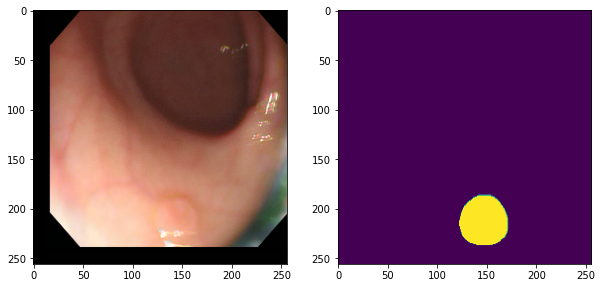

In [64]:
for images, labels in train_dataset.take(1):
    # Running next element in our graph will produce a batch of images
    plt.figure(figsize=(10, 10))
    img = images[0]

    plt.subplot(1, 2, 1)
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.imshow(labels[0, :, :, 0])
    plt.show()

15-4. Build the model
Ïò§Îäò Ïö∞Î¶¨Îäî Îëê Í∞úÏùò ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÎßåÎì§Ïñ¥ Î≥¥Í≥† ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥ Î≥º Í≤ÉÏûÖÎãàÎã§. ÌïòÎÇòÎäî Encoder-Decoder Ïä§ÌÉÄÏùºÏùò ÎÑ§Ìä∏ÏõåÌÅ¨Ïù¥Í≥†, Îã§Î•∏ ÌïòÎÇòÎäî U-NetÏûÖÎãàÎã§.

Encoder-Decoder architecture
EncoderÎ•º Ïù¥Ïö©Ìï¥ Ïö∞Î¶¨Í∞Ä Í∞ÄÏßÑ Train dataÎ•º ÏûëÏùÄ Ï∞®ÏõêÏùò Í≥µÍ∞ÑÏóê ÏïïÏ∂ïÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÎèôÏûëÌï©ÎãàÎã§.
DecoderÎäî EncoderÍ∞Ä ÏïïÏ∂ïÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Ïö∞Î¶¨Í∞Ä ÏõêÌïòÎäî label Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞ôÎèÑÎ°ù Ïû¨ÏÉùÏÑ±Ìï©ÎãàÎã§.
Ïù¥Î†áÍ≤å ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÏôÄ label Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûëÏïÑÏßÄÎèÑÎ°ù EncoderÏôÄ DecoderÏùò ÌååÎùºÎØ∏ÌÑ∞Îì§Ïù¥ End-to-EndÎ°ú ÌïôÏäµÎê©ÎãàÎã§.

Encoder
input dataÏùò shapeÍ∞Ä Îã§ÏùåÍ≥º Í∞ôÏù¥ ÎêòÎèÑÎ°ù ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Íµ¨ÏÑ±Ìï©ÎãàÎã§.
inputs = [batch_size, 256, 256, 3]
conv1 = [batch_size, 128, 128, 64]
conv2 = [batch_size, 64, 64, 128]
conv3 = [batch_size, 32, 32, 256]
outputs = [batch_size, 16, 16, 512]
Convolution - Normalization - Activation Îì±Ïùò Ï°∞Ìï©ÏùÑ Îã§ÏñëÌïòÍ≤å ÏÉùÍ∞ÅÌï¥ Î¥ÖÏãúÎã§.
EncoderÏùò Ï∞®ÏõêÏùÑ Ï§ÑÏó¨Í∞ÄÎäî Î∞©Î≤ïÏúºÎ°ú PoolingÏùÑ Ïì∏ÏßÄ Convolution with stride=2 Î°ú Ìï†ÏßÄ ÏÑ†ÌÉùÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§.
tf.keras.Sequential()ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§.

Decoder
EncoderÏùò mirror ÌòïÌÉúÎ°ú ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§.
input dataÏùò shapeÏù¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÎêòÎèÑÎ°ù ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Íµ¨ÏÑ±Ìï©ÎãàÎã§.
inputs = encoderÏùò outputs = [batch_size, 16, 16, 512]
conv_transpose1 = [batch_size, 32, 32, 256]
conv_transpose2 = [batch_size, 64, 64, 128]
conv_transpose3 = [batch_size, 128, 128, 64]
outputs = [batch_size, 256, 256, 1]
tf.keras.Sequential()ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§.

In [65]:
# inputs: [batch_size, 256, 256, 3]
encoder = tf.keras.Sequential(name='encoder')

# conv-batchnorm-activation-maxpool
encoder.add(layers.Conv2D(64, (3, 3), padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu'))
encoder.add(layers.Conv2D(64, (3, 3), strides=2, padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu')) # conv1: [batch_size, 128, 128, 64]

encoder.add(layers.Conv2D(128, (3, 3), padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu'))
encoder.add(layers.Conv2D(128, (3, 3), strides=2, padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu')) # conv2: [batch_size, 64, 64, 128]

encoder.add(layers.Conv2D(256, (3, 3), padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu'))
encoder.add(layers.Conv2D(256, (3, 3), strides=2, padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu')) # conv3: [batch_size, 32, 32, 256]

encoder.add(layers.Conv2D(512, (3, 3), padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu'))
encoder.add(layers.Conv2D(512, (3, 3), strides=2, padding='same'))
encoder.add(layers.BatchNormalization())
encoder.add(layers.Activation('relu')) # conv4-outputs: [batch_size, 16, 16, 512]

In [66]:
# Encoder Ï†úÎåÄÎ°ú ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏

bottleneck = encoder(tf.random.normal([batch_size, 256, 256, 3]))
print(bottleneck.shape)   # (batch_size, 16, 16, 512) Ïù¥ ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏

(8, 16, 16, 512)


8: Î∞∞Ïπò ÌÅ¨Í∏∞ (batch size) Í∞Ä 8ÏûÖÎãàÎã§. Ï¶â, encoder Î™®Îç∏Ïóê Ìïú Î≤àÏóê 8Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûÖÎ†•ÎêòÏóàÏäµÎãàÎã§.

16: ÌäπÏßï Îßµ(feature map)Ïùò ÎÜíÏù¥Í∞Ä 16ÏûÖÎãàÎã§.

16: ÌäπÏßï ÎßµÏùò ÎÑàÎπÑÍ∞Ä 16ÏûÖÎãàÎã§.

512: ÌäπÏßï ÎßµÏùò Ï±ÑÎÑê ÏàòÍ∞Ä 512ÏûÖÎãàÎã§. Ï¶â, Í∞Å ÌîΩÏÖÄ ÏúÑÏπòÏóê 512Í∞úÏùò ÌäπÏßïÏù¥ Ï∂îÏ∂úÎêòÏóàÏäµÎãàÎã§.

In [67]:
# inputs: [batch_size, 16, 16, 512]
decoder = tf.keras.Sequential(name='decoder')

# conv_transpose-batchnorm-activation
decoder.add(layers.Conv2DTranspose(256, (3, 3), strides=2, padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu')) # conv_transpose1: [batch_size, 32, 32, 256]
decoder.add(layers.Conv2D(256, (3, 3), padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu'))

decoder.add(layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu')) # conv_transpose2: [batch_size, 64, 64, 128]
decoder.add(layers.Conv2D(128, (3, 3), padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu'))

decoder.add(layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu')) # conv_transpose3: [batch_size, 128, 128, 64]
decoder.add(layers.Conv2D(64, (3, 3), padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu'))

decoder.add(layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu')) # conv transpose4-outputs: [batch_size, 256, 256, 32]
decoder.add(layers.Conv2D(32, (3, 3), padding='same'))
decoder.add(layers.BatchNormalization())
decoder.add(layers.Activation('relu'))

decoder.add(layers.Conv2DTranspose(1, 1, strides=1, padding='same', activation='sigmoid'))

In [68]:
# decoder Ï†úÎåÄÎ°ú ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏

predictions = decoder(bottleneck)
print(predictions.shape)    # (batch_size, 256, 256, 1) Ïù¥ ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏

(8, 256, 256, 1)


Create a encoder-decoder model
ÏßÄÍ∏àÍπåÏßÄ EncoderÏôÄ DecoderÎ•º Ïûò ÎßåÎì§Ïñ¥ ÏôîÎã§Î©¥ Ïù¥ ÎëòÏùÑ Í≤∞Ìï©Ìïú Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Í∞ÑÎã®Ìûà Íµ¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [69]:
ed_model = tf.keras.Sequential()

ed_model.add(encoder)
ed_model.add(decoder)

U-Net architecture
Ïò§Îäò Ïö∞Î¶¨Í∞Ä ÎßåÎì§Ïñ¥Î≥º U-Net Î™®Îç∏Íµ¨Ï°∞Îäî ÏïÑÎûò Í∑∏Î¶ºÍ≥º Í∞ôÏäµÎãàÎã§. Ïûò Î≥¥Î©¥ U-Net ÏõêÎ≥∏Í≥ºÎäî ÏïΩÍ∞Ñ Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§. ÎÖºÎ¨∏ ÏõêÎ≥∏Ïùò Íµ¨ÌòÑÏóêÏÑúÎäî paddingÏùÑ zeroÎ°ú ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Encoder Î†àÏù¥Ïñ¥ ÎåÄÎπÑ Decoder Î†àÏù¥Ïñ¥Ïóê ÏïΩÍ∞ÑÏùò ÏÇ¨Ïù¥Ï¶à Ï∂ïÏÜåÍ∞Ä Î∞úÏÉùÌï©ÎãàÎã§. Í∑∏Îü¨ÎÇò Ïö∞Î¶¨Îäî paddingÏùÑ sameÏúºÎ°ú ÎëêÍ≥† Encoder, DecoderÍ∞Ñ ÎåÄÏùëÌïòÎäî Î†àÏù¥Ïñ¥Ïùò ÏÇ¨Ïù¥Ï¶àÎ•º ÎèôÏùºÌïòÍ≤å Í∞ÄÏ†∏Í∞à Í≤ÉÏûÖÎãàÎã§. Ïù¥Í≤ÉÏùÄ ÌÅ¨Í≤å ÏÑ±Îä•Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏúºÎ©¥ÏÑúÎèÑ Íµ¨ÌòÑÏù¥ Ïö©Ïù¥Ìï† ÎøêÎçîÎü¨ Ïù¥ÌõÑ Î™®Îç∏Ïùò Ï∂îÍ∞ÄÍ∞úÏÑ†ÏùÑ ÎçîÏö± ÏâΩÍ≤å ÎßåÎì§Ïñ¥ Ï£ºÎäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§.

Model subclassingÏùÑ ÌôúÏö©Ìïú Íµ¨ÌòÑ
U-NetÏùÄ Encoder-Decoder Íµ¨Ï°∞ÏôÄÎäî Îã¨Î¶¨ Ìï¥Îãπ Î†àÏù¥Ïñ¥Ïùò outputsÏù¥ Î∞îÎ°ú Îã§Ïùå Î†àÏù¥Ïñ¥Ïùò inputsÏù¥ ÎêòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥Îü¥ÎïåÎäî ÏúÑÏóê Encoder-Decoder Î™®Îç∏Ï≤òÎüº tf.keras.Sequential()ÏùÑ Ïì∏ ÏàòÍ∞Ä ÏóÜÍ≤å Îê©ÎãàÎã§.

Sequential Íµ¨Ï°∞Í∞Ä ÏïÑÎãå ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÎßåÎì§ Îïå Ïì∏ Ïàò ÏûàÎäî API Í∞Ä Î∞îÎ°ú tf.keras functional API ÏûÖÎãàÎã§. Ïò§Îäò Ïö∞Î¶¨Îäî U-Net Íµ¨ÌòÑÏùÑ ÏúÑÌï¥ Model subclassing Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨, tf.keras.Model ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÌïòÏó¨ Íµ¨ÌòÑÌï† Í≤ÉÏûÖÎãàÎã§.

In [70]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        self.conv = layers.Conv2D(num_filters, kernel_size, padding='same')
        self.bn = layers.BatchNormalization()

    def call(self, inputs, training=True):
        x = self.conv(inputs)
        x = self.bn(x, training=training)
        x = layers.ReLU()(x)

        return x

In [71]:
class ConvBlock(tf.keras.Model):
    def __init__(self, num_filters):
        super(ConvBlock, self).__init__()
        self.conv1 = Conv(num_filters, 3)
        self.conv2 = Conv(num_filters * 2, 3)

    def call(self, inputs, training=True):
        encoder = self.conv1(inputs, training=training)
        encoder = self.conv2(encoder, training=training)

        return encoder

class ConvBlock_R(tf.keras.Model):
    def __init__(self, num_filters):
        super(ConvBlock_R, self).__init__()
        self.conv1 = Conv(num_filters, 3)
        self.conv2 = Conv(num_filters, 3)

    def call(self, inputs, training=True):
        decoder = self.conv1(inputs, training=training)
        decoder = self.conv2(decoder, training=training)

        return decoder


class EncoderBlock(tf.keras.Model):
    def __init__(self, num_filters):
        super(EncoderBlock, self).__init__()
        self.conv_block = ConvBlock(num_filters)
        self.encoder_pool = layers.MaxPool2D()

    def call(self, inputs, training=True):
        encoder = self.conv_block(inputs, training=training)
        encoder_pool = self.encoder_pool(encoder)

        return encoder_pool, encoder


class DecoderBlock(tf.keras.Model):
    def __init__(self, num_filters):
        super(DecoderBlock, self).__init__()
        self.convT = layers.Conv2DTranspose(num_filters, 3, strides=2, padding='same')
        self.bn = layers.BatchNormalization()
        self.conv_block_r = ConvBlock_R(num_filters)

    def call(self, input_tensor, concat_tensor, training=True):
        decoder = self.convT(input_tensor)            
        decoder = self.bn(decoder, training=training)
        decoder = layers.ReLU()(decoder)
        decoder = tf.concat([decoder, concat_tensor], axis=-1)
        decoder = self.conv_block_r(decoder, training=training)

        return decoder

In [72]:
class UNet(tf.keras.Model):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder_block1 = EncoderBlock(64)
        self.encoder_block2 = EncoderBlock(128)
        self.encoder_block3 = EncoderBlock(256)
        self.encoder_block4 = EncoderBlock(512)

        self.center = ConvBlock(1024)

        self.decoder_block4 = DecoderBlock(512)
        self.decoder_block3 = DecoderBlock(256)
        self.decoder_block2 = DecoderBlock(128)
        self.decoder_block1 = DecoderBlock(64)

        self.output_conv = layers.Conv2D(1, 1, activation='sigmoid')

    def call(self, inputs, training=True):
        encoder1_pool, encoder1 = self.encoder_block1(inputs)
        encoder2_pool, encoder2 = self.encoder_block2(encoder1_pool)
        encoder3_pool, encoder3 = self.encoder_block3(encoder2_pool)
        encoder4_pool, encoder4 = self.encoder_block4(encoder3_pool)

        center = self.center(encoder4_pool)

        decoder4 = self.decoder_block4(center, encoder4)
        decoder3 = self.decoder_block3(decoder4, encoder3)
        decoder2 = self.decoder_block2(decoder3, encoder2)
        decoder1 = self.decoder_block1(decoder2, encoder1)

        outputs = self.output_conv(decoder1)

        return outputs

Create a U-Net model
ÏúÑÏóêÏÑú Íµ¨ÌòÑÌïú ClassÎì§ÏùÑ ÏÉùÏÑ±Ìï¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú U-net Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï¥ Ï§çÏãúÎã§.

In [73]:
unet_model = UNet()

metricsÍ≥º loss functions Ï†ïÏùòÌïòÍ∏∞
Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† loss functionÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

binary cross entropy

dice_loss

Image Segmentation TaskÏóêÏÑú Ï†ïÎãµÏùÑ Îçî Ïûò Ï∞æÏïÑÎÇ¥Í∏∞ÏúÑÌï¥ ÏÉàÎ°úÏö¥ LossÎ•º Ï∂îÍ∞ÄÌï¥ ÏÇ¨Ïö©ÌïúÎã§.
ÎÖºÎ¨∏Ïóê ÎÇòÏò® Dice coefficient ÏàòÏãù

Cross-entropy lossÏôÄ Dice lossÎ•º Í∞ôÏù¥ ÏÇ¨Ïö©Ìï¥ meanIoUÎ•º Îçî Ïò¨Î¶¨ÎèÑÎ°ù ÌïôÏäµÌï† Ïàò ÏûàÎã§.

Cross-entropy lossÏôÄ Dice lossÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÏó¨ mean Intersection over Union (mIoU) Î•º ÎÜíÏù¥ÎèÑÎ°ù ÌïôÏäµÌïòÎäî Í≤ÉÏùÄ Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† (Image Segmentation) ÏûëÏóÖÏóêÏÑú ÌùîÌûà ÏÇ¨Ïö©ÎêòÎäî Ï†ÑÎûµÏûÖÎãàÎã§. Loss Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†ÏôÄ Îëê Loss Ìï®ÏàòÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Î•º ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥ ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.

1. Loss Ìï®ÏàòÏùò Ïó≠Ìï†:

Î™®Îç∏ ÌïôÏäµÏùò ÏßÄÌëú: Loss Ìï®ÏàòÎäî Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Ï†ïÎãµ(ground truth) Í∞ÑÏùò Ï∞®Ïù¥Î•º ÏàòÏπòÌôîÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò "ÏûòÎ™ª" ÏòàÏ∏°ÌñàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëúÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Î™®Îç∏ ÏµúÏ†ÅÌôîÏùò Î∞©Ìñ• Ï†úÏãú: Îî•Îü¨Îãù Î™®Îç∏ÏùÄ Loss Ìï®Ïàò Í∞íÏùÑ ÏµúÏÜåÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµÎê©ÎãàÎã§. Ï¶â, Loss Ìï®ÏàòÎäî Î™®Îç∏Ïù¥ ÌïôÏäµÌï¥Ïïº Ìï† Î∞©Ìñ•ÏùÑ Ï†úÏãúÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§.

Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏: Loss Ìï®Ïàò Í∞íÏùÄ Î™®Îç∏ ÎÇ¥Î∂ÄÏùò Í∞ÄÏ§ëÏπò(weights)Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§. Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(gradient descent)Í≥º Í∞ôÏùÄ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Loss Ìï®ÏàòÏùò Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÏó¨ Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†ïÌïòÍ≥†, Loss Ìï®Ïàò Í∞íÏùÑ Ï†êÏßÑÏ†ÅÏúºÎ°ú Í∞êÏÜåÏãúÌÇµÎãàÎã§.

2. Cross-entropy Loss:

Ï†ïÏùò: Ï£ºÎ°ú Î∂ÑÎ•ò(classification) Î¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Loss Ìï®ÏàòÏûÖÎãàÎã§. ÏòàÏ∏° ÌôïÎ•† Î∂ÑÌè¨ÏôÄ Ïã§Ï†ú ÌôïÎ•† Î∂ÑÌè¨ Í∞ÑÏùò Ï∞®Ïù¥Î•º Ï∏°Ï†ïÌï©ÎãàÎã§.

ÌäπÏßï:

Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•†ÏùÑ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌï©ÎãàÎã§.

ÏòàÏ∏°Ïù¥ ÌãÄÎ¶∞ Í≤ΩÏö∞, Ï¶â Ïã§Ï†ú ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•†Ïù¥ ÎÇÆÏùÑÏàòÎ°ù Loss Í∞íÏùÑ ÌÅ¨Í≤å Î∂ÄÏó¨Ìï©ÎãàÎã§.

Ïû•Ï†ê:

Íµ¨ÌòÑÏù¥ ÎπÑÍµêÏ†Å Í∞ÑÎã®Ìï©ÎãàÎã§.

Îã§ÏñëÌïú Î∂ÑÎ•ò Î¨∏Ï†úÏóê Ï†ÅÏö© Í∞ÄÎä•Ìï©ÎãàÎã§.

Îã®Ï†ê:

ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÏóê Ï∑®ÏïΩÌï† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Îã§Î•∏ ÌÅ¥ÎûòÏä§Ïóê ÎπÑÌï¥ Îß§Ïö∞ Ï†ÅÏùÄ Í≤ΩÏö∞, Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† Î¨∏Ï†úÏóêÏÑú ÏòÅÏó≠(region) Í∏∞Î∞òÏùò ÌäπÏßïÏùÑ Ïûò Î∞òÏòÅÌïòÏßÄ Î™ªÌï† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, ÌîΩÏÖÄ Îã®ÏúÑÏùò Ï†ïÌôïÎèÑÎäî ÎÜíÏùº Ïàò ÏûàÏßÄÎßå, Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏòÅÏó≠Ïùò ÌòïÌÉúÎÇò Ïó∞Í≤∞ÏÑ±ÏùÑ Í≥†Î†§ÌïòÏßÄ Î™ªÌï† Ïàò ÏûàÏäµÎãàÎã§.

3. Dice Loss:

Ï†ïÏùò: Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† Î¨∏Ï†úÏóêÏÑú Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Loss Ìï®ÏàòÏûÖÎãàÎã§. ÏòàÏ∏° ÏòÅÏó≠Í≥º Ïã§Ï†ú ÏòÅÏó≠ Í∞ÑÏùò Overlap (Í≤πÏπòÎäî Ï†ïÎèÑ) ÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.

ÌäπÏßï:

Îëê ÏòÅÏó≠ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Ï∏°Ï†ïÌïòÎäî Dice coefficientÎ•º Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§.

ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÏóê Îçú ÎØºÍ∞êÌï©ÎãàÎã§. Ï¶â, ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïùò ÏòÅÏó≠Ïù¥ Îã§Î•∏ ÌÅ¥ÎûòÏä§Ïóê ÎπÑÌï¥ Îß§Ïö∞ ÏûëÏùÄ Í≤ΩÏö∞ÏóêÎèÑ ÎπÑÍµêÏ†Å ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.

Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏòÅÏó≠Ïùò ÌòïÌÉúÎÇò Ïó∞Í≤∞ÏÑ±ÏùÑ Í≥†Î†§Ìï©ÎãàÎã§.

Ïû•Ï†ê:

ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÏóê Í∞ïÌï©ÎãàÎã§.

Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† ÏÑ±Îä• Ìñ•ÏÉÅÏóê Ìö®Í≥ºÏ†ÅÏûÖÎãàÎã§.

Îã®Ï†ê:

Íµ¨ÌòÑÏù¥ Cross-entropy LossÎ≥¥Îã§ Î≥µÏû°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Îß§Ïö∞ ÏûëÏùÄ Í∞ùÏ≤¥Ïóê ÎåÄÌï¥ÏÑúÎäî Î∂àÏïàÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

4. Cross-entropy LossÏôÄ Dice LossÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†:

ÏÉÅÌò∏ Î≥¥ÏôÑ: Cross-entropy LossÏôÄ Dice LossÎäî ÏÑúÎ°ú Îã§Î•∏ Ïû•Îã®Ï†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú Îëê Loss Ìï®ÏàòÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ ÏÑúÎ°úÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïòÍ≥†, Ïû•Ï†êÏùÑ Í∑πÎåÄÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†ú ÏôÑÌôî: Dice LossÎäî ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÏóê Í∞ïÌïòÎØÄÎ°ú, Cross-entropy LossÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÏòÅÏó≠ Í∏∞Î∞ò ÌäπÏßï Í∞ïÌôî: Dice LossÎäî ÏòÅÏó≠ Í∏∞Î∞òÏùò ÌäπÏßïÏùÑ Ïûò Î∞òÏòÅÌïòÎØÄÎ°ú, Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† Í≤∞Í≥ºÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌíàÏßàÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§.

mIoU Ìñ•ÏÉÅ: mIoU (mean Intersection over Union) Îäî Ïù¥ÎØ∏ÏßÄ Î∂ÑÌï† Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏßÄÌëú Ï§ë ÌïòÎÇòÏûÖÎãàÎã§. Cross-entropy LossÏôÄ Dice LossÎ•º Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ mIoU Í∞íÏùÑ ÎÜíÏù¥Îäî Îç∞ Ìö®Í≥ºÏ†ÅÏûÖÎãàÎã§.

üëâCross-entropy LossÎäî ÌîΩÏÖÄ Îã®ÏúÑÏùò Ï†ïÌôïÎèÑÏóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÎäî Î∞òÎ©¥, Dice LossÎäî ÏòÅÏó≠(region) Í∏∞Î∞òÏùò Ï†ïÌôïÎèÑÏóê Ï¥àÏ†êÏùÑ ÎßûÏ∂•ÎãàÎã§.

In [74]:
def dice_coeff(y_true, y_pred):
    smooth = 1e-10
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(tf.square(y_true_f)) + \
                                            tf.reduce_sum(tf.square(y_pred_f)) + smooth)

    return score

Dice LossÍ∞Ä ÏµúÎåÄÌôîÎêòÎäî Î∞©Ìñ•ÏúºÎ°ú Íµ¨Ìï¥ÏßÄÎèÑÎ°ù, ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [75]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

ÏÉàÎ°úÏö¥ Loss functionÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ÏúÑÌï¥ÏÑú Í∏∞Ï°¥Ïóê ÏÇ¨Ïö©ÌïòÏòÄÎçò Binary crossentropy lossÏôÄ ÏÉàÎ°ú Íµ¨ÌòÑÌïú Dice lossÎ•º ÎçîÌïòÎäî Î∞©ÏãùÏúºÎ°ú Íµ¨ÏÑ±Ìï©ÎãàÎã§.

In [76]:
def bce_dice_loss(y_true, y_pred):
    loss = tf.reduce_mean(losses.binary_crossentropy(y_true, y_pred)) + \
          dice_loss(y_true, y_pred)
    return loss

In [77]:
optimizer = tf.keras.optimizers.Adam() # Í∏∞Î≥∏ Learning rate ÏÇ¨Ïö©

Select a model

üëâselect select the U-Net model

In [78]:
# ÏúÑÏóêÏÑú Íµ¨ÏÑ±Ìïú ÎëêÍ∞ÄÏßÄ Î™®Îç∏ Ï§ëÏóêÏÑú ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï¥ Ï£ºÏÑ∏Ïöî. 
# Ïó¨Í∏∞ÏÑú ÏÑ†ÌÉùÏùÑ Î∞îÍæ∏Ïñ¥ Îã§Î•∏ Î™®Îç∏Ïùò ÌïôÏäµÎèÑ ÏßÑÌñâÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§. 

# print('select the Encoder-Decoder model')
# model = ed_model
# checkpoint_dir =os.path.join(DATASET_PATH,'train_ckpt/ed_model')

print('select the U-Net model')
model = unet_model
checkpoint_dir =os.path.join(DATASET_PATH,'train_ckpt/unet_model')

select the U-Net model


Compile

In [79]:
model.compile(optimizer=optimizer, loss=bce_dice_loss, metrics=[dice_loss])
predictions = model(tf.random.normal([batch_size, image_size, image_size, 3]))
print(predictions.shape)

(8, 256, 256, 1)


In [80]:
model.summary()

Model: "u_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_block_4 (EncoderBloc multiple                  76416     
_________________________________________________________________
encoder_block_5 (EncoderBloc multiple                  444288    
_________________________________________________________________
encoder_block_6 (EncoderBloc multiple                  1773312   
_________________________________________________________________
encoder_block_7 (EncoderBloc multiple                  7085568   
_________________________________________________________________
conv_block_9 (ConvBlock)     multiple                  28326912  
_________________________________________________________________
decoder_block_4 (DecoderBloc multiple                  18882048  
_________________________________________________________________
decoder_block_5 (DecoderBloc multiple                  3542

Callbacks
Callback Ìï®ÏàòÎì§ÏùÑ Ïù¥Ïö©ÌïòÏó¨, ÌïôÏäµ Ï§ëÍ∞ÑÏóê ÏõêÌïòÎäî ÎèôÏûëÏùÑ Ìï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§.
ModelCheckpoint callback Ìï®ÏàòÎäî Î™®Îç∏ ÌïôÏäµÍ∞Ñ ÌäπÏ†ï featureÎ•º Î™®ÎãàÌÑ∞ÎßÅÌïòÎã§ Í∏∞Ï§ÄÏ†êÏùÑ ÎÑòÏúºÎ©¥ Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÄÏû•ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§.
LearningRateScheduler callback Ìï®ÏàòÎäî ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎ©∞, Ï£ºÏñ¥ÏßÑ Ïù∏ÏûêÏùò Í∞íÏùÑ Ïù¥Ïö©Ìï¥ Learning rateÎ•º Ï°∞Ï†àÌï¥Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§.
cos_decayÎäî cos Ìï®ÏàòÏùò Î™®ÏñëÏúºÎ°ú Learning rateÎ•º Ï°∞Ï†àÌï¥ Ï£ºÎäî learning rate decay Íµ¨ÌòÑÏûÖÎãàÎã§.

In [81]:
if not os.path.isdir(checkpoint_dir):
    os.makedirs(checkpoint_dir)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=0)

In [82]:
cos_decay = tf.keras.experimental.CosineDecay(1e-3, 
                                              max_epochs)
lr_callback = tf.keras.callbacks.LearningRateScheduler(cos_decay, verbose=1)

15-5. Train your model
Î™®Îç∏ ÌïôÏäµ Ïù¥Ï†ÑÏóê, Î™®Îç∏ÏóêÏÑú ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÎØ∏Î¶¨ ÏûëÏÑ±Ìï¥ Î™®Îç∏ ÏÑ±Îä• ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [83]:
## Define print function
def print_images():
    for test_images, test_labels in test_dataset.take(1):
        predictions = model(test_images, training=False)

        plt.figure(figsize=(10, 20))
        plt.subplot(1, 3, 1)
        plt.imshow(test_images[0,: , :, :])
        plt.title("Input image")

        plt.subplot(1, 3, 2)
        plt.imshow(test_labels[0, :, :, 0])
        plt.title("Actual Mask")

        plt.subplot(1, 3, 3)
        plt.imshow(predictions[0, :, :, 0])
        plt.title("Predicted Mask")
        plt.show()

Training - model.fit() Ìï®Ïàò Ïù¥Ïö©
ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎ©∞, ÏúÑÏóêÏÑú Íµ¨ÏÑ±Ìïú Train datasetÍ≥º Test datasetÎì±ÏùÑ Ïù¥Ïö©Ìï¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
üëâÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàòÍ∞Ä Î∂ÄÏ°±ÌïòÍ∏∞ÎïåÎ¨∏Ïóê Test datasetÏùÑ Validation datasetÏúºÎ°ú ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§.
ÏïÑÎûòÎäî modelÎ•º ÌïôÏäµÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§. 10 EpochÎßå ÌïôÏäµÏùÑ ÏßÑÌñâÌïú ÌõÑ, ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¨ ÏòàÏ†ïÏûÖÎãàÎã§.

In [84]:
history = model.fit(train_dataset,
                    epochs=max_epochs,    # 10
                    steps_per_epoch=num_train_examples//batch_size,
                    validation_data=test_dataset,
                    validation_steps=num_test_examples//batch_size,
                    callbacks=[cp_callback, lr_callback]
                    )

Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
30/30 [==============================] - 36s 833ms/step - loss: 1.0103 - dice_loss: 0.7135 - val_loss: 40.0274 - val_dice_loss: 0.9104
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.00097552827, shape=(), dtype=float32).
30/30 [==============================] - 26s 828ms/step - loss: 0.8378 - dice_loss: 0.6300 - val_loss: 2.9608 - val_dice_loss: 0.8889
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.0009045085, shape=(), dtype=float32).
30/30 [==============================] - 26s 838ms/step - loss: 0.7643 - dice_loss: 0.5811 - val_loss: 1.1753 - val_dice_loss: 0.8427
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to tf.Tensor(0.00079389266, shape=(), dtype=float32).
30/30 [==============================] - 27s 853ms/step - loss: 0.7529 - dice_loss: 0.5715 - val_loss: 1.0523 - va

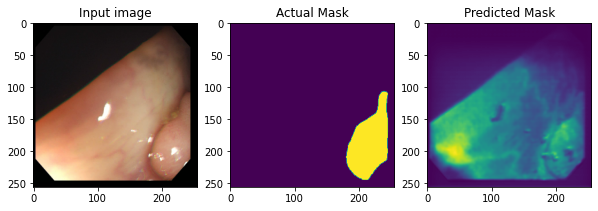

In [85]:
# print sample image after training
print_images()

Plot the loss
Ï†ÄÏû•Îêú ÌïôÏäµ ÏßÑÌñâÍ≥ºÏ†ï(history)ÏùÑ ÏãúÍ∞ÅÌôîÌï¥ Î¥ÖÏãúÎã§.

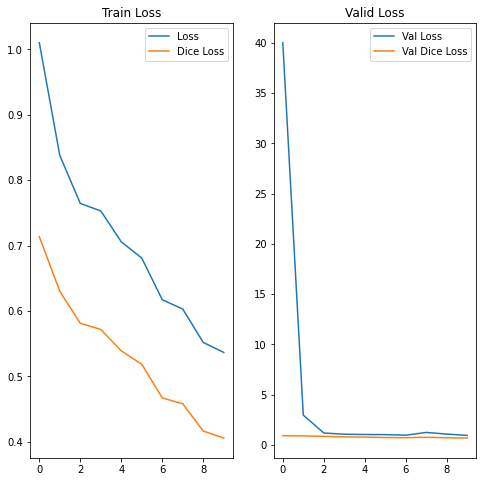

In [86]:
dice_loss = history.history['dice_loss']
loss = history.history['loss']
val_dice_loss = history.history['val_dice_loss']
val_loss = history.history['val_loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, dice_loss, label='Dice Loss')
plt.legend(loc='upper right')
plt.title('Train Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.plot(epochs_range, val_dice_loss, label='Val Dice Loss')
plt.legend(loc='upper right')
plt.title('Valid Loss')
plt.show()

Í≤∞Í≥º Î∂ÑÏÑù)
1. ÌõàÎ†® ÏÜêÏã§ (Train Loss) Í∑∏ÎûòÌîÑ:LossÏôÄ Dice LossÏùò Í∞ÑÍ≤©: Îëê Loss Í∞í ÏÇ¨Ïù¥Ïùò Í∞ÑÍ≤©Ïù¥ Ï¢ÅÌòÄÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ Cross-entropy LossÏôÄ Dice LossÎ•º Î™®Îëê ÎßåÏ°±ÏãúÌÇ§Îäî Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµÎêòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

2. Í≤ÄÏ¶ù ÏÜêÏã§ (Valid Loss) Î∂ÑÏÑù:
Val Loss (ÌååÎûÄÏÉâ): Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÜêÏã§Î°ú, ÌõàÎ†® Ï¥àÍ∏∞Ïóê Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïòÏßÄÎßå, Ïù¥ÌõÑÏóêÎäî Í±∞Ïùò Î≥ÄÌôîÍ∞Ä ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌäπÌûà, 0-2 epoch ÏÇ¨Ïù¥Ïóê Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïú Ïù¥ÌõÑÏóêÎäî Í±∞Ïùò ÏàòÎ†¥ÌïòÎäî ÌòïÌÉúÎ•º Î≥¥ÏûÖÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Îçî Ïù¥ÏÉÅ ÌïôÏäµ Ìö®Í≥ºÎ•º Î≥¥Í∏∞ Ïñ¥Î†µÎã§Îäî Í≤ÉÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
Val Dice Loss (Ï£ºÌô©ÏÉâ): Val LossÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÎÇÆÏùÄ Í∞íÏùÑ Ïú†ÏßÄÌïòÎ©∞, Í±∞Ïùò Î≥ÄÌôîÍ∞Ä ÏóÜÏäµÎãàÎã§. Val LossÏôÄ Val Dice LossÏùò Í∞ÑÍ≤©Ïù¥ Îß§Ïö∞ Ï¢ÅÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

3. Ï†ÑÏ≤¥Ï†ÅÏù∏ Ìï¥ÏÑù:

Í≥ºÏ†ÅÌï©(Overfitting) Í∞ÄÎä•ÏÑ±: ÌõàÎ†® ÏÜêÏã§ÏùÄ Íæ∏Ï§ÄÌûà Í∞êÏÜåÌïòÎäî Î∞òÎ©¥, Í≤ÄÏ¶ù ÏÜêÏã§ÏùÄ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÎ°úÎäî Í∞úÏÑ†ÎêòÏßÄ ÏïäÎäî Í≤ÉÏùÄ Î™®Îç∏Ïù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï©ÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. Ï¶â, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏßÄÎÇòÏπòÍ≤å ÎßûÏ∂∞Ï†∏ÏÑú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà Ïàò ÏûàÏäµÎãàÎã§.

3.1. ÏÑ±Îä• Í∞úÏÑ† ÌïÑÏöî: Val Dice LossÍ∞Ä Í∞úÏÑ†ÎêòÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏùÄ Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ ÎÇÆÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ï¶â, ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Îä•Î†•Ïù¥ Îñ®Ïñ¥ÏßÑÎã§Îäî Í≤ÉÏûÖÎãàÎã§.


üëâCross-entropy Loss (ÍµêÏ∞® ÏóîÌä∏Î°úÌîº ÏÜêÏã§): Ï£ºÎ°ú Î∂ÑÎ•ò(classification) Î¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Loss Ìï®ÏàòÏûÖÎãàÎã§. ÏòàÏ∏° ÌôïÎ•† Î∂ÑÌè¨ÏôÄ Ïã§Ï†ú ÌôïÎ•† Î∂ÑÌè¨ Í∞ÑÏùò Ï∞®Ïù¥Î•º Ï∏°Ï†ïÌï©ÎãàÎã§.

Restore the latest checkpoint
Ï†ÄÏû•Îêú Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎ•º Î∂àÎü¨ÏòµÎãàÎã§. ed_ckptÎÇò unet_ckptÏóê Îã¥Í∏¥ Í≤ÉÏù¥ ÎØ∏Î¶¨ ÌïôÏäµÏãúÌÇ® Î™®Îç∏ÏûÖÎãàÎã§. ÏßÅÏ†ë ÌïôÏäµÏãúÌÇ® Î™®Îç∏ÏùÄ train_ckptÏóê ÏûàÏäµÎãàÎã§. ÏõêÌïòÎäî Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

In [87]:
# ÏõêÌïòÎäî Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎèÑÎ°ù Ï†ÅÏ†àÌûà Ï£ºÏÑùÏùÑ Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî
# checkpoint_dir = os.path.join(DATASET_PATH, 'ed_ckpt/ed_model')
checkpoint_dir = os.path.join(DATASET_PATH, 'unet_ckpt/unet_model')

# restoring the latest checkpoint in checkpoint_dir
model.load_weights(checkpoint_dir)

Evaluate the test dataset
Î∂àÎü¨Ïò® Í∞ÄÏ§ëÏπòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥ Î¥ÖÏãúÎã§. meanIoUÎ•º metricÏúºÎ°ú ÌïòÏó¨ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌï¥ Î≥º Ïàò ÏûàÍ≥†, Ïã§Ï†ú ÏÉùÏÑ±Îêú segmentation Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÏÑùÌï¥ÏÑú Ï†ïÏÑ±Ï†ÅÏúºÎ°ú ÌèâÍ∞ÄÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

meanIoUÎûÄ Í∞Å Ïù¥ÎØ∏ÏßÄÏùò IoU Í∞íÏùÑ ÌèâÍ∑† ÎÇ∏ Í∞íÏûÖÎãàÎã§. IoUÎäî segmentation Î™®Îç∏ÏùÑ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïòÎäîÎç∞ Ï¢ãÏùÄ metricÏù¥ Îê©ÎãàÎã§. Í∞úÎÖêÏùÄ ÏïÑÎûò Í∑∏Î¶ºÍ≥º Í∞ôÏäµÎãàÎã§.

In [88]:
def mean_iou(y_true, y_pred, num_classes=2):
    # Flatten  
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    y_true_f = tf.cast(tf.round(y_true_f), dtype=tf.int32).numpy()
    y_pred_f = tf.cast(tf.round(y_pred_f), dtype=tf.int32).numpy()

    # calculate confusion matrix
    labels = list(range(num_classes))
    current = confusion_matrix(y_true_f, y_pred_f, labels=labels)

    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection

    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨ÏôÄÏÑú meanIoU Í∞íÏùÑ Íµ¨Ìï¥ Î¥ÖÏãúÎã§. Ïù¥ Í∞íÏù¥ Ïö∞Î¶¨Í∞Ä ÌõàÎ†®ÏãúÌÇ® Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÎüâÏ†Å ÏÑ±Îä• metricÏù¥ Îê©ÎãàÎã§.

In [89]:
mean = []

for images, labels in test_dataset:
    predictions = model(images, training=False)
    m = mean_iou(labels, predictions)
    mean.append(m)

mean = np.array(mean)
mean = np.mean(mean)
print("mean_iou: {}".format(mean))

mean_iou: 0.9403515949039798


Test Dataset ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÏñºÎßåÌÅº Ïûò ÎßûÏ∂îÏóàÎäîÏßÄ ÏßÅÏ†ë ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

## Define print function
def print_images():
    for test_images, test_labels in test_dataset.take(1):
        predictions = model(test_images, training=False)

        for i in range(batch_size):
            plt.figure(figsize=(10, 20))
            plt.subplot(1, 3, 1)
            plt.imshow(test_images[i,: , :, :])
            plt.title("Input image")

            plt.subplot(1, 3, 2)
            plt.imshow(test_labels[i, :, :, 0])
            plt.title("Actual Mask")

            plt.subplot(1, 3, 3)
            plt.imshow(predictions[i, :, :, 0])
            plt.title("Predicted Mask")
            plt.show()

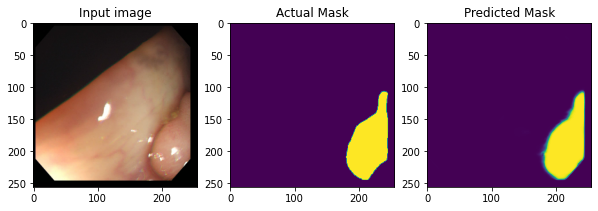

In [90]:
print_images()